__we will walk through step by step process of how to build a real estate price prediction website. We will first build a model using sklearn and linear regression using banglore home prices dataset from kaggle.com. Second step would be to write a python flask server that uses the saved model to serve http requests. Third component is the website built in html, css and javascript that allows user to enter home square ft area, bedrooms etc and it will call python flask server to retrieve the predicted price. During model building we will cover almost all data science concepts such as data load and cleaning, outlier detection and removal, feature engineering, dimensionality reduction, gridsearchcv for hyperparameter tunning, k fold cross validation etc.__
[Dataset is downloaded from here:](https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data)



In [1]:
# import necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
matplotlib.rcParams['figure.figsize'] =(10,10)
%matplotlib inline 
print('modules have imported')

modules have imported


## Load our data

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.columns 

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

## Drop unnecessary featuers 

In [8]:
df2 = df.drop(['area_type','availability', 'balcony', 'society'],axis=1)

In [9]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Cleaning : Handle NaN values 

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2.shape

(13320, 5)

In [12]:
df3 = df2.dropna()

In [13]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.shape

(13246, 5)

## Feature Engineering 

In [15]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


####  add new feature(integer) for bhk bedrooms , hall and kitchen 


In [16]:
df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))

df3.bhk.unique()

<ipython-input-16-87f3a4b37c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x:int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### total_sqft can be range of values we will take the average of it and for values such as 34.46Sq instead of converting it using unit conversion we will just drop it 

In [18]:
# first detect a given value its float or not 
def its_float(x):
    try :
        float(x)
    except:
        return False
    return True 

#def is_float(col):
#    try :
 #       float(col)
 #   except 
   #     return False
  #  return True 
#.apply(is_float)
# 
df3[~df3['total_sqft'].apply(its_float)]

#def num_converter(col):
#    tokens = col.split('-')
#    if len(tokens) == 2 :
#        return float(tokens[0]) + float(tokens[1]) / 2 
#    try :
#        return float(col)
#    except :
#        return None

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
# look at the values where itsnt not a valid float number 
df3[~df3['total_sqft'].apply(its_float)].head(5)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [20]:
# lets convert these values to numbers 

def num_converter(x):
    coins = x.split('-')
    if len(coins) == 2:
        return (float(coins[0]) + float(coins[1])) / 2
    try :
        return float(x)
    except:
        return None 

In [21]:
#test 
num_converter('44-444')

244.0

In [22]:
num_converter('34.465q. Meter') # returns None 

In [23]:
df4 = df3.copy()
df4['total_sqft'] = df4.total_sqft.apply(num_converter)


In [24]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
# look at the index 30 to check 

df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

#### add new feature price_per_sqft 


In [26]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations



In [27]:
df5['location'] = df5.location.apply(lambda x:x.strip())
location_stats = df5['location'].value_counts(ascending = False)
location_stats

#df5['location'].unique()
#location_stats = df5.groupby('location')['location'].count()
#location_stats[location_stats <= 10]
#df5['location'] = df5['location'].apply(lambda x: 'others' if x in location_less else x)

Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     266
Thanisandra        236
                  ... 
arudi                1
Banagirinagar        1
Venkateshpuram       1
Banasawadi,          1
Chickpet             1
Name: location, Length: 1293, dtype: int64

In [28]:
location_stats.values.sum()

13246

In [29]:
len(location_stats)

1293

In [30]:
len(location_stats[location_stats > 10])

241

In [31]:
len(location_stats[location_stats <= 10])

1052

### Dimensionality Reduction
#### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [32]:
locations_less = location_stats[location_stats <= 10]
locations_less

Nagappa Reddy Layout    10
Dodsworth Layout        10
BTM 1st Stage           10
Naganathapura           10
Ganga Nagar             10
                        ..
arudi                    1
Banagirinagar            1
Venkateshpuram           1
Banasawadi,              1
Chickpet                 1
Name: location, Length: 1052, dtype: int64

In [33]:
len(df5.location.unique())

1293

In [34]:
df5.location = df5.location.apply(lambda x:'others' if x in locations_less else x )

In [35]:
len(df5.location.unique())

242

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,others,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Removal Using Business Logic
__As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft__

In [37]:
df5[df5['total_sqft'] / df5['bhk'] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely



In [38]:
df5.shape

(13246, 7)

In [39]:
df6 = df5[~(df5['total_sqft'] / df5['bhk'] < 300)]
df6.shape

(12502, 7)

### Outlier Removal Using Standard Deviation and Mean


In [40]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation



In [41]:

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like



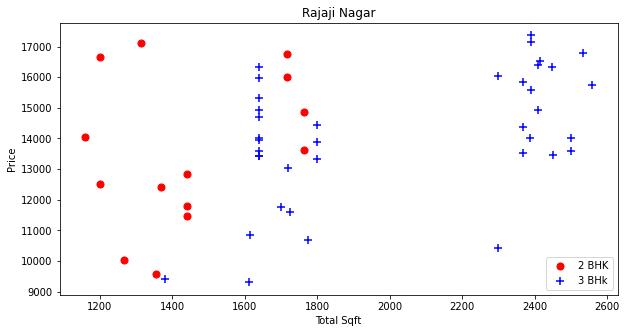

In [42]:
def scatter_plot(df,location):
    
    bhk2 = df[(df['location'] == location) &(df['bhk'] == 2) ]
    bhk3 = df[(df['location'] == location) &(df['bhk'] == 3) ]
    
    plt.figure(figsize=(10,5))
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft ,color='red', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft ,color='blue', label = '3 BHk',marker = '+', s = 60)
    plt.xlabel('Total Sqft')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

scatter_plot(df7,'Rajaji Nagar')

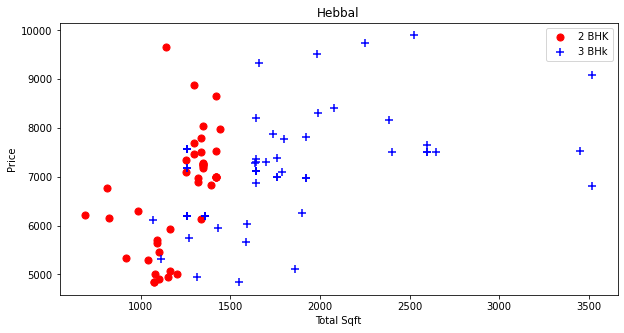

In [43]:
scatter_plot(df7,"Hebbal")


Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment



In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

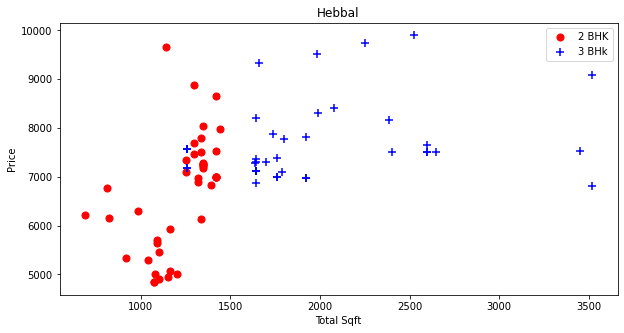

In [45]:
# let see after removing those 2 bhk outliers 
scatter_plot(df8,"Hebbal")


Text(0, 0.5, 'Count')

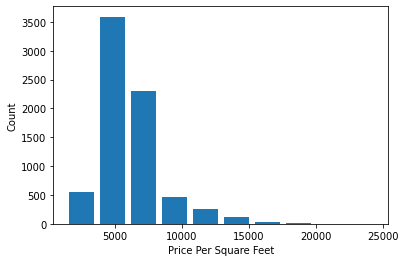

In [46]:
# how many apartments per square feet
plt.hist(df8['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

### Outlier Removal Using Bathrooms Feature

In [47]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

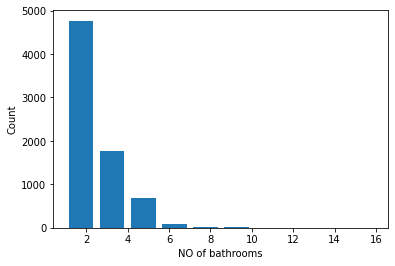

In [48]:
plt.hist(df8['bath'],rwidth=0.8)
plt.xlabel('NO of bathrooms')
plt.ylabel('Count')

In [49]:
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [50]:
df8[df8.bath>10]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home



In [51]:
df8[df8.bath>df8.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed



In [53]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape


(7251, 7)

In [55]:

df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [56]:

dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11 = pd.concat([df10,dummies.drop('others',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Building a model

In [ ]:
df12.shape


In [60]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:

y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [65]:

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
#lr_clf.score(X_test,y_test)

LinearRegression()

In [66]:
#Random permutation cross-validator
#Evaluate a score by cross-validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)



array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model(X,y):
    
    algos = {
        'linearRegression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
                
            }
        }
    }
    
    scores = list()
    
    cv = ShuffleSplit(n_splits= 5 , test_size = 0.2 , random_state = 0)
    
    for model , params in algos.items():
        grid = GridSearchCV(params['model'], params['params'], 
                           cv=cv, 
                            return_train_score=False)
        grid.fit(X,y)
        scores.append({
            'model':model,
            'best_score':grid.best_score_,
             'best_params':grid.best_params_
        })
    return pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

In [76]:
best_model(X,y)

,model,best_score,best_params
0,linearRegression,0.818354,{'normalize': False}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.722077,"{'criterion': 'mse', 'splitter': 'best'}"


In [82]:
#Test the model for few properties

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [83]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


83.4990467659196

## Export the tested model to a pickle file 

In [84]:
import pickle  
with open('home_price_model.pickle','wb') as f:
    pickle.dumb(lr_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [85]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))